In [7]:
# -------------------------------------------
# STEP 2.1: IMPORT LIBRARIES
# -------------------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [8]:
file_path = r"C:\Users\Sriharshini\Downloads\nbfc_credit_risk_dataset.csv"
df = pd.read_csv(file_path)
df.head()

,borrower_id,age,business_type,years_in_operation,region,annual_revenue,ebitda_margin,cashflow_stability,bank_balance_avg,dti_ratio,dscr,loan_amount,tenure_months,interest_rate,past_delinquencies,dpd_last_6m,repayment_consistency,monthly_inflow,monthly_outflow,default
0,1,39,Retail,6,North,61.85,13.28,0.59,0.10,0.11,1.49,6.64,24,15.94,0,8,0.95,3.26,10.24,0
1,2,33,Manufacturing,0,West,51.95,16.90,1.00,5.41,0.34,1.04,15.35,36,16.45,0,4,0.83,12.85,4.16,1
2,3,41,Construction,0,North,93.49,13.60,0.78,3.58,0.43,1.84,22.60,48,17.68,0,10,0.63,1.34,4.15,0
3,4,50,Retail,3,South,76.86,3.36,0.94,2.28,0.43,1.13,13.57,36,14.98,0,0,1.00,6.51,6.26,0
4,5,32,Healthcare,3,East,60.85,13.34,0.94,1.54,0.37,1.46,14.03,12,10.00,0,0,0.52,1.00,9.94,0


In [11]:
# Select numeric columns
num_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()

# Remove ID column
num_cols.remove("borrower_id")

# Features and target
X = df[num_cols]
y = df["default"]

X.head()


,age,years_in_operation,annual_revenue,ebitda_margin,cashflow_stability,bank_balance_avg,dti_ratio,dscr,loan_amount,tenure_months,interest_rate,past_delinquencies,dpd_last_6m,repayment_consistency,monthly_inflow,monthly_outflow,default
0,39,6,61.85,13.28,0.59,0.10,0.11,1.49,6.64,24,15.94,0,8,0.95,3.26,10.24,0
1,33,0,51.95,16.90,1.00,5.41,0.34,1.04,15.35,36,16.45,0,4,0.83,12.85,4.16,1
2,41,0,93.49,13.60,0.78,3.58,0.43,1.84,22.60,48,17.68,0,10,0.63,1.34,4.15,0
3,50,3,76.86,3.36,0.94,2.28,0.43,1.13,13.57,36,14.98,0,0,1.00,6.51,6.26,0
4,32,3,60.85,13.34,0.94,1.54,0.37,1.46,14.03,12,10.00,0,0,0.52,1.00,9.94,0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:,1]

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("LR AUC:", roc_auc_score(y_test, y_prob_lr))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1693
           1       1.00      1.00      1.00       807

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500

LR AUC: 1.0


In [19]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("RF AUC:", roc_auc_score(y_test, y_prob_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1693
           1       1.00      1.00      1.00       807

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500

RF AUC: 1.0


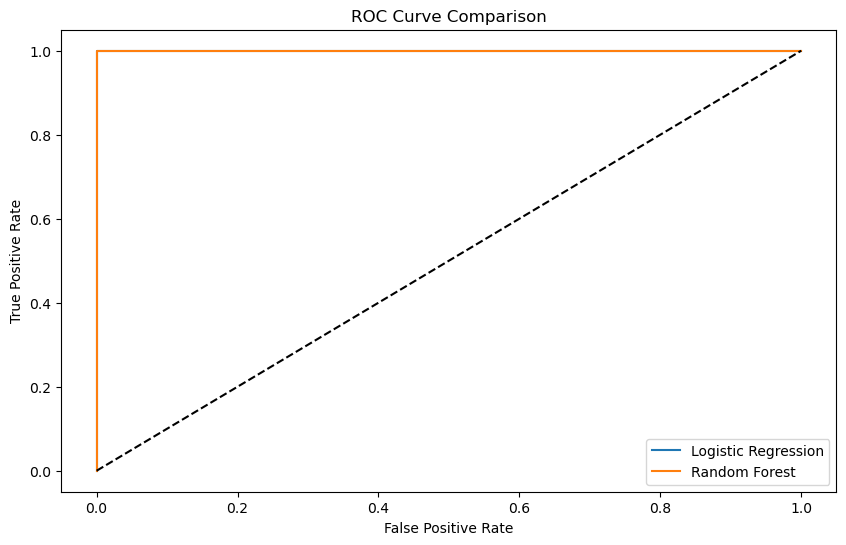

In [20]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(10,6))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0,1], [0,1], "k--")

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [23]:
def ks_statistic(y_true, y_prob):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    return max(tpr - fpr)

print("KS (Logistic Regression):", ks_statistic(y_test, y_prob_lr))
print("KS (Random Forest):", ks_statistic(y_test, y_prob_rf))



KS (Logistic Regression): 1.0
KS (Random Forest): 1.0


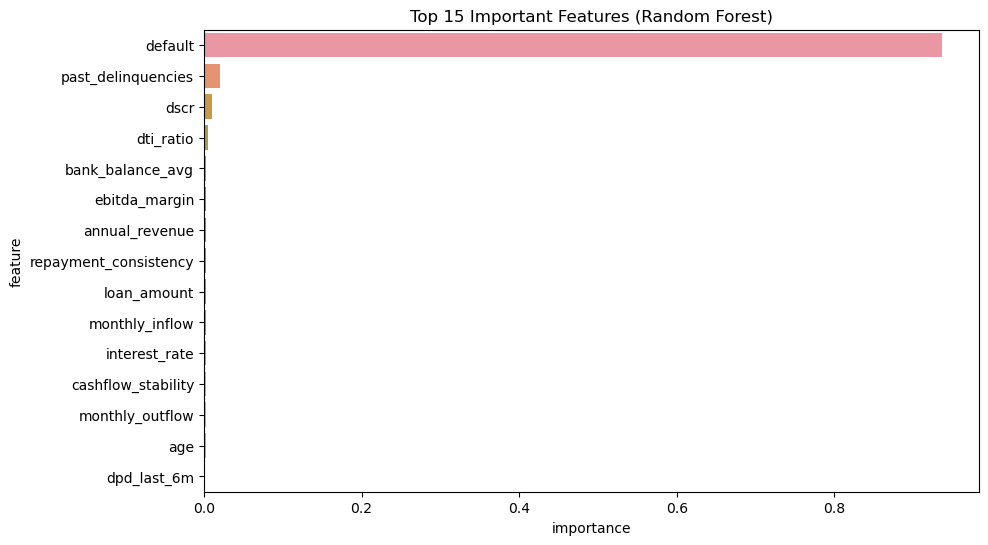

In [25]:
importances = pd.DataFrame({
    "feature": X_train.columns,
    "importance": rf.feature_importances_
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=importances.head(15), x="importance", y="feature")
plt.title("Top 15 Important Features (Random Forest)")
plt.show()

In [27]:
import os
import pickle
os.makedirs("models", exist_ok=True)

with open("models/risk_model.pkl", "wb") as f:
    pickle.dump(rf, f)

with open("models/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [1]:
print("Scaler expects:", scaler.n_features_in_)

NameError: name 'scaler' is not defined